# TACS Exam WS 23/24

### Organizational

The exam is carried out in 5 teams of 2 or 3 students each. The tasks are to classify images with 3 categories of objects:
1. **Yun Lin**, **Jorge Ulises Montañez Arnaus** & **Yang Yutian**: Dirt Roads vs. Country Roads vs. Highways
2. **Janet Nogossek**, **Nathalie Kurz** & **Lili Mounier**: Tennis vs. Rugby vs. Football (Soccer)
3. **Alexander Gensch**, **Lea Döttling** & **Batuhan Dursun**: Bridges vs. (Big / Office) Buildings vs. (Detached) Houses
4. **Marcel Kraft** & **Mario Kozul**: Rivers vs. Lakes vs. Seas
5. **Diego Galvan** & **Victor Chapela**: Computers vs. Smartphones vs. Tablets

The final report including the jupyter notebook must be submitted to Ilias by **Sunday, January 7th, 2024, 23:59** at the latest.

The final presentations (10 min per group) will be held on **Wednesday, January 10th, 2024, 9:50 - 13:00**.

___

Group No.: 5

Categories: Computers vs. Smartphones vs. Tablets

Student 1:
- Name: Diego Galvan Arellano
- Matriculation: 90321

Student 2:
- Name: *FILL IN*
- Matriculation: *FILL IN*

___

### Tasks

#### Data collection and preparation

Collect and prepare exactly **360 images** (online search or manuel generation):
- **300 images** for training (**100 images** per category) and
- **60 images** for testing (**20 images** per category).

Prepare the images to have:
- **224 x 224** pixels per images with **3 color channels** -> shape (300, 224, 224, 3) and (60, 224, 224, 3)
- Numpy float32 data type with range from 0.0 to 1.0

Prepare the labels to have:
- Uint8 data type with values in {0, 1, 2} -> shape (300) and (60)

Apply augmentation strategies to multiply the training data (not the test data!) using one of the following concepts
- <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers">Keras layers</a> for augmentation, e.g. <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip">RandomFlip</a>
- <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers">Keras image preprocessing</a>, e.g. <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/random_zoom">random_zoom</a>
- Keras <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">ImageDataGenerator</a>

#### Model training and evaluation

Develop, train and evaluate **four** different models (MLP, CNN Small, CNN Medium, CNN Large) with the following restrictions using <a href="https://www.tensorflow.org/api_docs/python/tf/keras/Sequential">Keras Sequential Model</a>:
<html>
    <table>
        <tr>
            <th>Maximim number of</th>
            <th>MLP</th>
            <th>CNN Small</th>
            <th>CNN Medium</th>
            <th>CNN Large</th>
        </tr>
        <tr>
            <td>Dense layers</td>
            <td>8</td>
            <td>1</td>
            <td>2</td>
            <td>2</td>
        </tr>
        <tr>
            <td>Conv2D layers</td>
            <td>0</td>
            <td>4</td>
            <td>10</td>
            <td>30</td>
        </tr>
        <tr>
            <td>trainable parameters</td>
            <td>150M</td>
            <td>10M</td>
            <td>30M</td>
            <td>100M</td>
        </tr>
    </table>
</html>
    
Compare the neural networks regarding:
- reached accuracy
- required trainings steps
- observed overfitting
    
Hints:
- Try ReLU activations first (for Conv2D and Dense layers except last layer)
- Use Flatten layers before first Dense layer
- First layer must define input_shape=(224, 224, 3)

#### Result visualization

Plot the results, e.g. accuracy over epochs graph or image and predition plots, using the <a href="https://matplotlib.org/stable/api/pyplot_summary.html">matplotlib.pyplot</a> module:

<html>
    <img src="accuracy_and_loss.png" width="280px" style="display: inline-block; vertical-align: top;"/>
    <img src="results.png" width="500px" style="display: inline-block; vertical-align: top;"/>
</html>

### Final report

Write a final report of approximatly 6 or 9 pages (3 pages per student) including plots.

The report should cover the following aspects:
- general procedure
- data preprocessing, including augmentation
- developed MLPs and CNNs, including development process
- experiments and results, including plots
- own conclusions

________________________________________________

## Introduction

This code forms the foundation for a machine learning project focused on image classification, specifically targeting the recognition of electronic devices such as cellphones, tablets, and laptops. The overarching goal is to develop four neural network models capable of distinguishing between these three classes based on input images.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


This code snippet is crucial for optimizing GPU memory usage during deep learning tasks. By dynamically allocating memory as needed, it prevents OOM errors that may occur when processing large datasets or building complex neural networks. The script provides insight into the number of physical and logical GPUs available, ensuring that memory growth is set appropriately for each detected GPU.

### Dataset

#### Load data

The choice of image_dataset_from_directory for loading data is advantageous because it simplifies the process of organizing and labeling images. This function automatically detects the subdirectories in the specified directories (data test & data train), assigns labels based on subdirectory names (laptops, cellphones, tables), and loads the images. This approach is particularly useful for structured datasets where images are organized into folders by class.

crop_to_aspect_ratio property has added further into development on the models given the realization that compressing the images to be squared without cropping would actually change significantlly the shape of the devices, mainly causing simmilarities between tablets and cellphones.

In [2]:
train_data = tf.keras.utils.image_dataset_from_directory('data train',image_size=(224,224), batch_size = 300, crop_to_aspect_ratio = True)
test_data = tf.keras.utils.image_dataset_from_directory('data test',image_size=(224,224), batch_size = 60, crop_to_aspect_ratio = True)
train_batch = train_data.as_numpy_iterator().next()
test_batch = test_data.as_numpy_iterator().next()

Found 300 files belonging to 3 classes.
Found 60 files belonging to 3 classes.


#### Prepare data

Normalization: Normalizing pixel values to the range [0, 1] is common in image processing. It ensures that the model is less sensitive to the scale of pixel values and helps in the convergence of optimization algorithms.

Data Type Conversion: Converting labels to uint8 is a memory-efficient choice, as it ensures that each label requires only 8 bits of memory. This is beneficial when dealing with large datasets.

The inspect_data function is designed to print information about a given NumPy array.

Parameters:

name: A string representing the name or identifier of the array.
array: The NumPy array to be inspected.
Printed Information:

The function prints the name of the array.
It then prints the data type (dtype) of the array.
The shape of the array is printed to show its dimensions.
The range is displayed as the minimum and maximum values (min and max) and the mean value (mean).

The inspect_all_data function serves as way to apply the inspect_data function to multiple arrays related to training and testing data. It calls inspect_data for each of the arrays.

A Matplotlib figure is created with a size of (10, 10).

A loop iterates over the first 25 elements of the train_images array.
For each image, a subplot is created in a 5x5 grid.
The image is displayed using plt.imshow, with the color map set to binary.
The x-axis label is set to the corresponding class name based on train_labels.

train_images:
dtype: float32
shape: (300, 224, 224, 3)
ragne is between 0 and 1 (Ø 0.59)

train_labels:
dtype: uint8
shape: (300,)
ragne is between 0 and 2 (Ø 1.00)

test_images:
dtype: float32
shape: (60, 224, 224, 3)
ragne is between 0 and 1 (Ø 0.57)

test_labels:
dtype: uint8
shape: (60,)
ragne is between 0 and 2 (Ø 1.00)



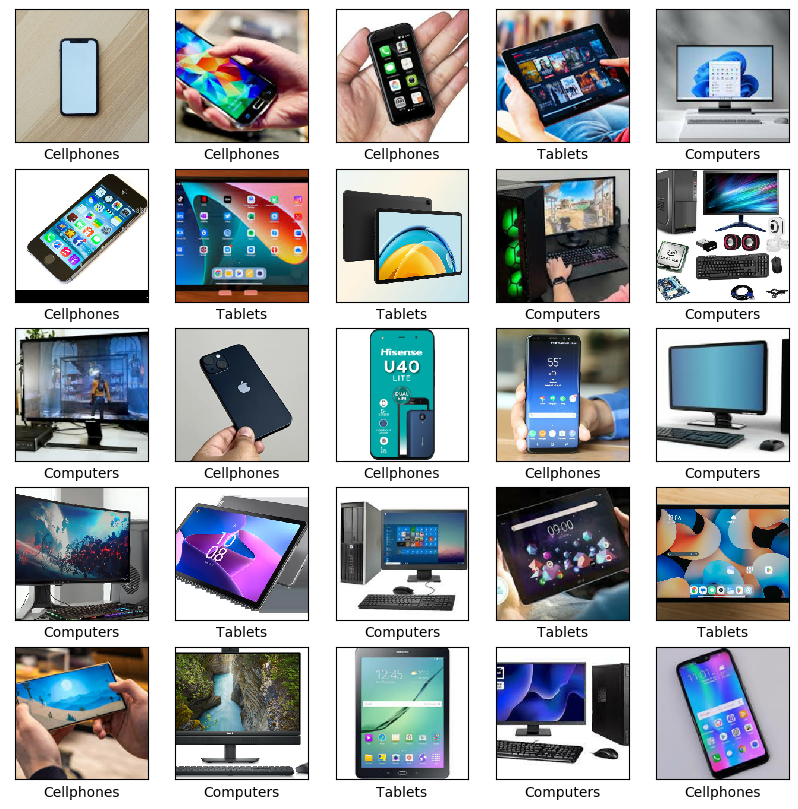

In [3]:
train_images = train_batch[0] / 255
train_labels = train_batch[1].astype(np.uint8)
test_images = test_batch[0] / 255
test_labels = test_batch[1].astype(np.uint8)

def inspect_data(name, array):
    '''Prints the name as well as the dtype, shape and range (min, max and mean value) of the given array.'''
    
    print(name + ":")
    # Add lines here --->
    print("dtype: {}".format(array.dtype))
    print("shape: {}".format(array.shape))
    print("ragne is between {:.0f} and {:.0f} (Ø {:.2f})".format(np.min(array),np.max(array),np.mean(array)))
    # <--- Add lines here
    print()

def inspect_all_data():
    
    inspect_data("train_images", train_images)
    inspect_data("train_labels", train_labels)
    inspect_data("test_images", test_images)
    inspect_data("test_labels", test_labels)
    
inspect_all_data()

class_names = ["Cellphones", "Computers", "Tablets"]

plt.figure(figsize=(10,10))

for index in range(25):
    plt.subplot(5, 5, index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[index], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[index]])

#### Augment data

In [4]:
# Augment your data (only here if you are not using real-time data augmentation)

# Add your code here...

### Models

#### MLP model

MLP Model Architecture Explanation:

1. Data Augmentation Layers:

- RandomFlip, RandomRotation, RandomZoom: Data augmentation is crucial for training deep learning models on image data. By applying horizontal flips, rotations, and zooms randomly to the input images, the model becomes more robust to variations in the training set. This helps prevent overfitting and improves the model's ability to generalize to unseen data.

- The RandomFlip layer randomly flips a fraction of the input images horizontally, creating variations in the training set. This helps the model become invariant to horizontal flips, enhancing its robustness.
The RandomRotation layer randomly rotates a fraction of the input images, providing the model with different perspectives of the objects in the images. This aids in improving the model's ability to recognize objects at different orientations.
The RandomZoom layer randomly zooms a fraction of the input images, simulating changes in scale. This helps the model generalize better to objects appearing at different sizes in the real-world scenarios.

2. Flatten Layer:

- The Flatten layer reshapes the input tensor into a flat vector, preparing it for the transition from convolutional layers to dense layers. This layer ensures compatibility between the output of convolutional layers and the input of dense layers.

3. Dense Layers:
- Dense (Fully Connected) Layers with ReLU Activation:
The dense layers are responsible for feature extraction and introducing non-linearity to the model. Each dense layer connects every neuron to every neuron in the previous and subsequent layers. The ReLU (Rectified Linear Unit) activation function introduces non-linearity, allowing the model to learn complex patterns and relationships in the data. The choice of 200 units in each dense layer is determined based on the constraint of a maximum of 150 million parameters. This number is calculated to distribute the available parameters evenly across the layers while considering the input shape. Having the same number of units in each dense layer can makes the architecture more straightforward to design and interpret. 

- Output Layer with Softmax Activation:
The output layer is responsible for producing the final classification probabilities. It has three units, corresponding to the three classes. The softmax activation function is used to convert the model's raw outputs into 3 different probabilities. Each output represents the likelihood of the input belonging to a specific class.

In [5]:
# Build MLP model
# Max. Dense layers: 8
# Max. Conv2D layers: 0
# Max. params: 150,000,000

from tensorflow.keras import layers, models, optimizers

model_mlp = models.Sequential([
    layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    
    layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    
    layers.Dense(256, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),

    layers.Dense(3, activation='softmax')
])

# Print the model summary
model_mlp.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 512)               77070848  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                          

#### Small CNN model

The provided small Convolutional Neural Network (CNN) architecture is designed to efficiently process and classify images, adhering to a constraint of a maximum of 10 million parameters. It begins with data augmentation layers, including random horizontal flips, rotations, and zooms, to enhance the model's robustness. The subsequent convolutional layers, each followed by batch normalization and max-pooling, progressively capture hierarchical features from low to high level. A dropout layer is introduced for regularization to mitigate overfitting. The final dense layer with softmax activation produces the classification probabilities for the three classes in the task. The model is structured to strike a balance between complexity and computational efficiency, making it suitable for image classification tasks with limited computational resources while leveraging data augmentation and dropout for improved generalization.

1. Convolutional Layers:

- Number of Filters (64, 128): The number of filters determines the capacity of the convolutional layers to capture features.VGG and ResNet
The gradual increase and decrease in the number of filters in convolutional layers (64, 128, 64) follow a common architectural pattern known as a "pyramid" or "hourglass." This structure creates a hierarchy of features, starting with capturing basic patterns in early layers (64 filters), progressing to more complex representations (128 filters), and then refining the learned features (64 filters). This approach balances computational efficiency, effective feature extraction, and helps prevent overfitting. It has proven successful in computer vision tasks like image classification

- Kernel Size (3x3): A 3x3 kernel is commonly chosen in convolutional layers due to its small receptive field, parameter efficiency, and ability to capture local features effectively. Its non-linearity, along with the ReLU activation function, aids in learning complex representations. The hierarchical feature learning, translation invariance, and computational efficiency make it a standard choice in CNN architectures, contributing to the success of models like VGG and ResNet

2. Batch Normalization:

- After Convolutional Layers: Batch normalization normalizes activations, stabilizing and accelerating the training process. Applying it after each convolutional layer ensures consistent normalization throughout the network.

3. MaxPooling2D:

- Reduction in Spatial Dimensions: Max pooling reduces spatial dimensions, capturing the most important information while discarding less relevant details. It helps the model focus on significant features.

4. Flatten Layer:
- Transition to Dense Layers: The flatten layer is essential to transition from spatial representations in convolutional layers to a flat vector suitable for input to dense layers.

5. Dropout Layer (0.5):
 - Regularization: A dropout rate of 0.5 means that during training, 50% of the neurons in the dropout layer are randomly set to zero. This introduces regularization, preventing overfitting by encouraging the model to rely on a diverse set of features.

In [6]:
# Build small CNN model
# Max. Dense layers: 1
# Max. Conv2D layers: 4
# Max. params: 10,000,000

model_cnn_s = tf.keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.05),
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.6),
    
    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    
    layers.Dropout(0.7),
    layers.Dense(3, activation='softmax')
])


# Print model summary to check the number of parameters
model_cnn_s.summary()

# Add your code here...

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_6 (Batc  (None, 222, 222, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)    

#### Medium CNN model

In [16]:
# Build medium CNN model
# Max. Dense layers: 2
# Max. Conv2D layers: 10
# Max. params: 30,000,000

model_cnn_m = tf.keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(1024, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(1024, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(3, activation='softmax')
])

# Print model summary to check the number of parameters
model_cnn_m.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_4 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_4 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_4 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_30 (Bat  (None, 222, 222, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 64)    

#### Large CNN model

In [17]:
    # Build large CNN model
    # Max. Dense layers: 2
    # Max. Conv2D layers: 30
    # Max. params: 100,000,000

    model_cnn_l = tf.keras.Sequential([
        layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),

        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', input_shape=(224, 224, 3)),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        
        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),

        layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        
        layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        
        layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),

        layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),


        layers.Flatten(),

        layers.Dense(2048, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(2048, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(3, activation='softmax')
    ])

    # Print model summary to check the number of parameters
    model_cnn_l.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_5 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_5 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_5 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_37 (Bat  (None, 222, 222, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_26 (Conv2D)          (None, 220, 220, 64)     

### Training

In [9]:
from time import time
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

epochs = 200 #hoose your epoch count
batch_size = 8 # Choose your batch size
#model = model_mlp # Choose your model
# models = (model_mlp, model_cnn_s, model_cnn_m, model_cnn_l)
model= model_cnn_s # Choose your model

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 50:
        return 1e-3
    elif 50 <= epoch < 80:
        return 1e-4
    else:
        return 1e-5

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

#Learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

start_time = time()

training = model.fit(train_images,
                     train_labels,
                     validation_data=(test_images, test_labels),
                     epochs=epochs,
                     batch_size=batch_size,
                     callbacks=[early_stopping, lr_scheduler])

print()
print(f"Training finished after {time() - start_time:.3f} s")


Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
38/38 [==============================] - ETA: 0s - loss: 7.6709 - accuracy: 0.5833WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D56DF87EE8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`)

### Visualization

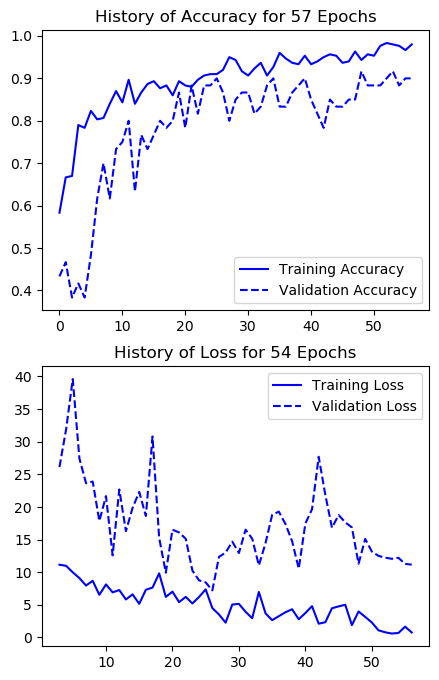

In [13]:
# Add your code here...
acc = training.history['accuracy']
val_acc = training.history['val_accuracy']

loss = training.history['loss']
val_loss = training.history['val_loss']

epochs_range = range(len(val_acc))

plt.figure(figsize=(5, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', linestyle='solid', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', linestyle='dashed', color='blue')
plt.legend(loc='lower right')
plt.title(f'History of Accuracy for {len(epochs_range)} Epochs')

# Skip the first value
epochs_range = epochs_range[3:]
loss = loss[3:]
val_loss = val_loss[3:]

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss', linestyle='solid', color='blue')
plt.plot(epochs_range, val_loss, label='Validation Loss', linestyle='dashed', color='blue')
plt.legend(loc='upper right')
plt.title(f'History of Loss for {len(epochs_range)} Epochs')
plt.show()

## Predictions

In [14]:
predictions = model.predict(test_images, batch_size = 16)

predictions[0]

predicted_label = np.argmax(predictions[0])
predicted_score = predictions[0][predicted_label]

print(f"Predicted label: {predicted_label} with {predicted_score:2.1%} ('{class_names[predicted_label]}')\n")

print(f"This is the {'CORRECT' if test_labels[0] == predicted_label else 'INCORRECT'} label!")


4/4 [==============================] - 0s 73ms/step
Predicted label: 0 with 100.0% ('Cellphones')

This is the CORRECT label!


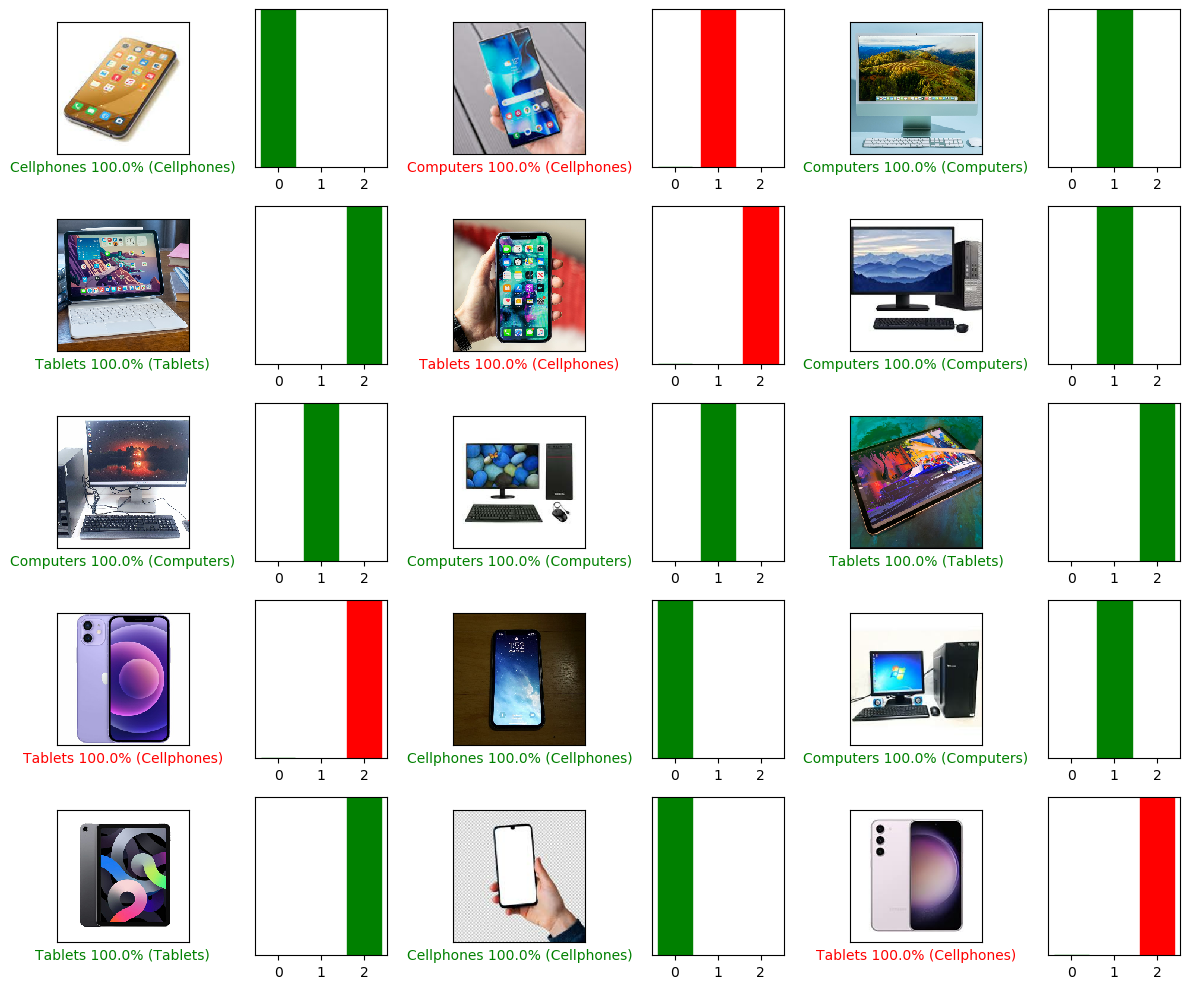

In [15]:
 def plot_image(predictions, groundtruth, image):
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(image, cmap=plt.cm.binary)
    
    # Complete lines here --->
    # prediction_index = ...
    predicted_label = np.argmax(predictions)
    # prediction_probability = ...
    prediction_probability = predictions[predicted_label]
    # <--- Complete lines here
    
    if predicted_label == groundtruth:
        color = "green"
    else:
        color = "red"
    
    # Old style string formatting to allow coloring
    plt.xlabel("{} {:2.1%} ({})".format(class_names[predicted_label],
                                        prediction_probability,
                                        class_names[groundtruth]),
                                        color=color)

def plot_value_array(predictions, groundtruth):
    
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    
    thisplot = plt.bar(range(3), predictions, color="gray")
    plt.ylim([0, 1])

    # Complete lines here --->
    predicted_label = np.argmax(predictions)
    # prediction_index = ...

    thisplot[predicted_label].set_color("red")
    thisplot[groundtruth].set_color("green")
    
num_rows = 5
num_cols = 3

def subplot(index, plot_number):
    plt.subplot(num_rows, 2 * num_cols, 2 * index + plot_number)

plt.figure(figsize=(4 * num_cols, 2 * num_rows))

for index in range(num_rows * num_cols):
    subplot(index, 1)
    plot_image(predictions[index], test_labels[index], test_images[index])
    
    subplot(index, 2)
    plot_value_array(predictions[index], test_labels[index])
    
plt.tight_layout()
plt.show()